In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [33]:
def getDataSetX(item, start, to, size) :
    arr = []
    for i in range(start, to - (size-1)) :
        arr.append(item[i:i+size , 0])
    nparr = np.array(arr)
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))
    return (nparr)

In [34]:
def getDataSetY(item, start, to, size) :
    arr = []
    for i in range(start + size, to + 1) :
        arr.append(item[i, 0])
    nparr = np.array(arr)
    return (nparr)

In [35]:
df = pd.read_csv("C:/Users/user8/Desktop/Temp_data.csv")
df = df.iloc[ :100000]
print(df.shape)

(100000, 7)


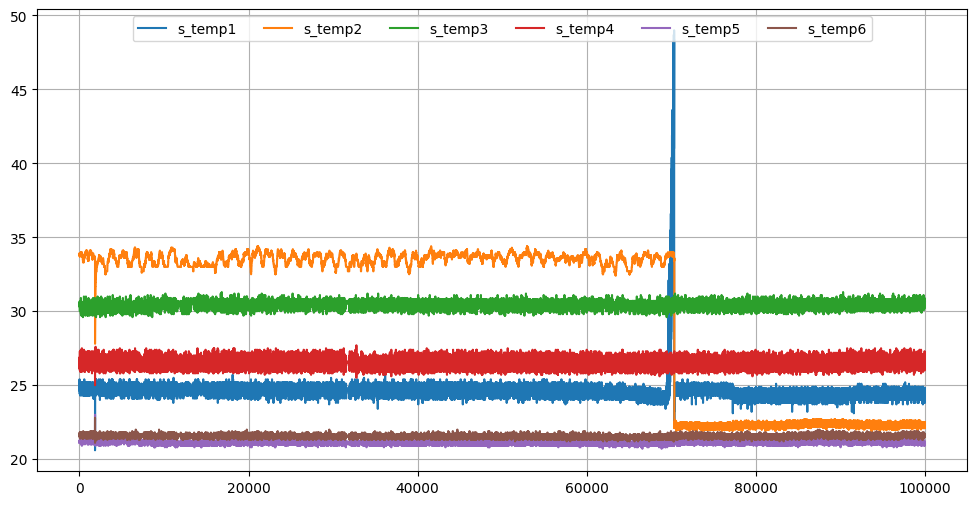

In [36]:
plt.figure(figsize=(12,6))

plt.plot(df['S_TEMP1'], label='s_temp1')
plt.plot(df['S_TEMP2'], label='s_temp2')
plt.plot(df['S_TEMP3'], label='s_temp3')
plt.plot(df['S_TEMP4'], label='s_temp4')
plt.plot(df['S_TEMP5'], label='s_temp5')
plt.plot(df['S_TEMP6'], label='s_temp6')
plt.legend(loc='upper center', ncol=6)
plt.grid()

plt.show()

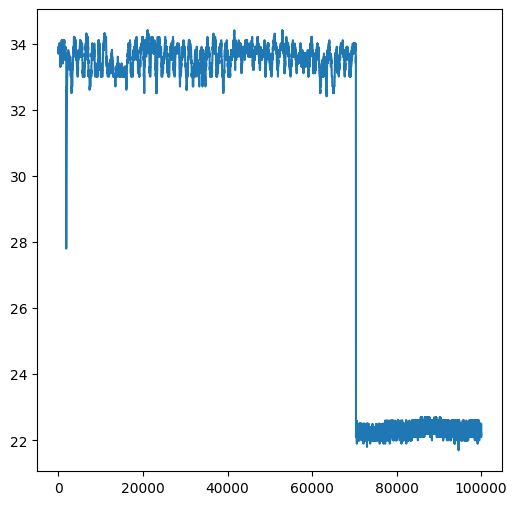

In [37]:
plt.figure(figsize=(6,6))
plt.plot(df['S_TEMP2'])
plt.show()

In [38]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['S_TIME', 'S_TEMP2'])

for i in range(0, len(data)) :
    
    new_data['S_TIME'][i] = data['S_TIME'][i]
    new_data['S_TEMP2'][i] = data['S_TEMP2'][i]
    
new_data.index = new_data.S_TIME
new_data.drop('S_TIME', axis=1, inplace=True)

final_data = new_data.values

train_idx = int(final_data.shape[0] * 0.8)

print(train_idx)
print(final_data.shape[0] - train_idx)

80000
20000


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_data) 

In [40]:
x_train = getDataSetX(scaled_data, 0, train_idx-1, 10)
y_train = getDataSetY(scaled_data, 0, train_idx-1, 10)
x_test = getDataSetX(scaled_data, train_idx, final_data.shape[0]-1, 10)
y_test = getDataSetY(scaled_data, train_idx, final_data.shape[0]-1, 10)

In [41]:
lstm_model = Sequential([
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(units=10),
    Dense(1)
])
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 10)            480       
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [42]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32,
                             validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0070 - val_loss: 0.0248
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.6083e-05 - val_loss: 0.0110
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.4536e-05 - val_loss: 0.0118
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.4027e-05 - val_loss: 0.0122
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.2658e-05 - val_loss: 0.0126
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.2935e-05 - val_loss: 0.0134
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.1321e-05 - val_loss: 0.0144
Epoch 8/10
2000/2000 [==============================] - 8s 4ms/step - loss: 3.0366e-05 - val_loss: 0.0150
Epoch 9/10
2000/2000 [==============================] - 8s 4ms/step - loss: 2.7547e-05 - val_loss: 0.0148
Epoch 10/10
2000/2000 [===========================

In [43]:
lstm_model.save('C:/Users/user8/Desktop/lstm_temp2.h5')

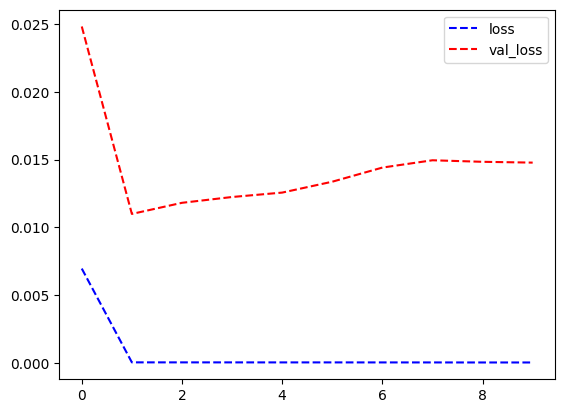

In [44]:
plt.plot(history_lstm.history['loss'], 'b--', label='loss')
plt.plot(history_lstm.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [45]:
pred_s_temp2 = lstm_model.predict(x_test)
pred_s_temp2 = scaler.inverse_transform(pred_s_temp2)

In [46]:
test_data = final_data[train_idx: , : ]
print(test_data[10:, 0])
print(pred_s_temp2[ : , 0])

# MAPE(Mean Absolute Percentage Error)
print(np.mean(np.abs((test_data[10:, 0] - pred_s_temp2[ : , 0]) / test_data[10:, 0]))*100)

[22.1 22.4 22.2 ... 22.3 22.4 22.2]
[24.263542 24.25386  24.255322 ... 24.262463 24.261435 24.266674]
8.692381629105238


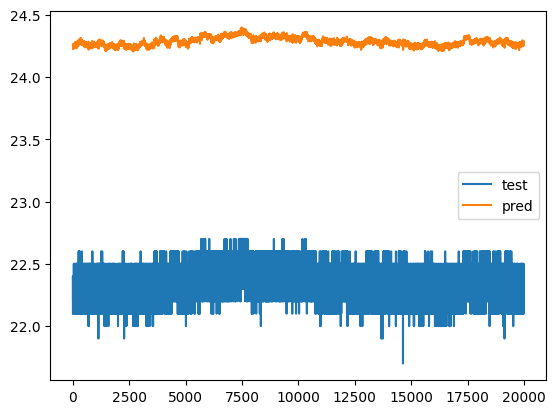

In [47]:
plt.plot(test_data[10:, 0], label='test')
plt.plot(pred_s_temp2[:], label='pred')
plt.legend()
plt.show()